#### 续
#### 可选参数的添加
`parser.add_argument("--verbosity", help="increase output verbosity")`  

* 当不附带该选项运行程序时将不会提示任何错误。 请注意在默认情况下，如果一个可选参数未被使用，则关联的变量，在这个例子中是 args.verbosity，将被赋值为 None，这也就是它在 if 语句中无法通过真值检测的原因
* 使用 --verbosity 选项时，必须指定一个值，但可以是任何值  

`parser.add_argument("--verbose", help="increase output verbosity",action="store_true")`
* 关键词 action="store_true"。 这意味着，如果指定了该选项，则将值 True 赋给 args.verbose。 如未指定则表示其值为 False
* 这把参数变为一个标志，同时如果为他指定一个值将会报错  
* action关键词在帮助输出并没有提供很多信息，我们需要自行添加参数帮助信息（比如通过 help 关键字参数）。

`parser.add_argument("-v", "--verbose", help="increase output verbosity",action="store_true")`
* 短选项参数添加

`parser.add_argument("-v", "--verbosity", type=int, choices=[0, 1, 2],help="increase output verbosity")`  
* 关键词choices=[]会限定参数的范围  

`parser.add_argument("-v", "--verbosity", action="count",help="increase output verbosity")`  
* 关键词action="count"。意味着会计算参数名v或verboity重复的次数
* 跟action="store_true"一样，不指定参数则默认为None
* action关键词在帮助输出并没有提供很多信息，我们需要自行添加参数帮助信息（比如通过 help 关键字参数）。

`parser.add_argument("-v", "--verbosity", action="count", default=0,help="increase output verbosity")`  
* default参数将会在不指定参数时，默认参数的数值
* 记住，不使用default情况下如果一个可选参数没有被指定，它的值会是 None，并且它不能和整数值相比较（所以产生了 TypeError 异常）。

`parser.add_argument("integers", type=int,nargs=2,help="第一个整数")`
* nargs表示位置参数的个数，参数会以list的形式存储下来  


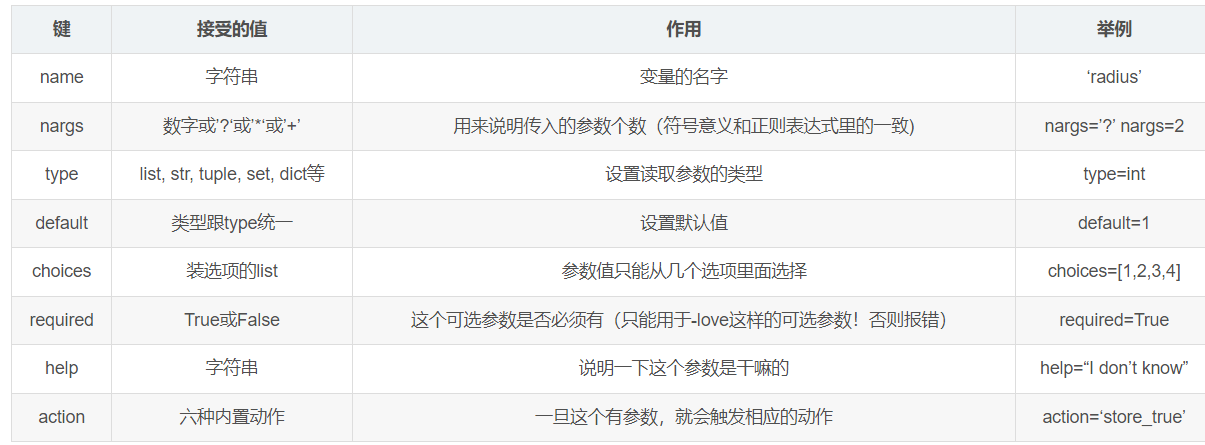

官方文档：https://docs.python.org/zh-cn/3/library/argparse.html#module-argparse  


In [ ]:
import argparse
parser = argparse.ArgumentParser()
parser.add_argument("square", type=int,
                    help="display a square of a given number")
parser.add_argument("-v", "--verbosity", type=int, choices=[0, 1, 2],
                    help="increase output verbosity")
args = parser.parse_args()
answer = args.square**2
if args.verbosity == 2:
    print(f"the square of {args.square} equals {answer}")
elif args.verbosity == 1:
    print(f"{args.square}^2 == {answer}")
else:
    print(answer)

###############################################################################
$python prog.py 4 -v 3
usage: prog.py [-h] [-v {0,1,2}] square
prog.py: error: argument -v/--verbosity: invalid choice: 3 (choose from 0, 1, 2)
$python prog.py 4 -h
usage: prog.py [-h] [-v {0,1,2}] square

positional arguments:
  square                display a square of a given number

options:
  -h, --help            show this help message and exit
  -v {0,1,2}, --verbosity {0,1,2}
                        increase output verbosity

In [ ]:
import argparse
parser = argparse.ArgumentParser()
parser.add_argument("square", type=int,
                    help="display a square of a given number")
                    
parser.add_argument("-v", "--verbosity", action="count",
                    help="increase output verbosity")
args = parser.parse_args()
answer = args.square**2

# bugfix: replace == with >=
if args.verbosity >= 2:
    print(f"the square of {args.square} equals {answer}")
elif args.verbosity >= 1:
    print(f"{args.square}^2 == {answer}")
else:
    print(answer)
##############################################
$python prog.py 4 -vvv
the square of 4 equals 16
$python prog.py 4 -vvvv
the square of 4 equals 16
$python prog.py 4
Traceback (most recent call last):
  File "prog.py", line 11, in <module>
    if args.verbosity >= 2:
TypeError: '>=' not supported between instances of 'NoneType' and 'int'

## 视觉工具包torchvision 
torchvision 主要包含三部分：  

models：提供深度学习中各种经典网络的网络结构以及预训练好的模型，包括 AlexNet 、VGG 系列、ResNet 系列、Inception 系列等；  
datasets： 提供常用的数据集加载，设计上都是继承 torch.utils.data.Dataset，主要包括 MNIST、CIFAR10/100、ImageNet、COCO等；  
transforms：提供常用的数据预处理操作，主要包括对 Tensor 以及 PIL Image 对象的操作；  

### torchvision.transforms库
`import torchvision.transforms as transforms`  

#### 基本使用
`train_transformer = transforms.Compose([`  
`     transforms.ToPILImage(),`  
`    transforms.Resize(256),`  
`    transforms.RandomHorizontalFlip(),`  
`    transforms.ToTensor(),`  
`    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])`  
`])`  
* transforms.Compose函数就是将transforms组合在一起；而每一个transforms都有自己的功能。最终只要使用定义好的train_transformer 就可以按照循序处理transforms的要求的.  

`transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)), #R,G,B每层的归一化用到的均值和方差` 
* 对图像的每个通道进行标准化处理，俩个括号里面的分别是每个通道的均值和标准差
* 利用标准化操作：normalized=(pixel_value-mean)/σ   
  

    
    
相关链接https://zhuanlan.zhihu.com/p/130985895  

官方文档https://pytorch.ac.cn/vision/0.19/auto_examples/transforms/plot_transforms_getting_started.html#sphx-glr-auto-examples-transforms-plot-transforms-getting-started-py

#### 

### datasets库
Datasets模块提供了需要常用的数据集以及其具体的使用方法，比如下图所示的图像分类中常用的CIFAR10数据集

#### 基本使用
`torchvision.datasets.CIFAR10(root: Union[str, Path], train: bool = True, transform: Optional[Callable] = None, target_transform: Optional[Callable] = None, download: bool = False)`  

root：就是你想要保存MNIST数据集的位置，如果download是Flase的话，则会从目标位置读取数据集；

download：True的话就会自动从网上下载这个数据集，到root的位置；  

train：True的话，数据集下载的是训练数据集；False的话则下载测试数据集（真方便，都不用自己划分了）  

transform：这个是对图像进行处理的transform，比方说旋转平移缩放，输入的是PIL格式的图像（不是tensor矩阵）； 
 
target_transform：这个是对图像标签进行处理的函数（这个我没用过不太确定，也许是做标签平滑那种的处理？）  


In [ ]:

import torchvision
#创建训练数据集
train_set = torchvision.datasets.CIFAR10(root="./dataset3",train=True,download=True)
#创建测试数据集
test_set = torchvision.datasets.CIFAR10(root="./dataset3",train=False,download=True)
 
#1. 查看数据集的图片
#输出所有类别
print(test_set.classes)
#输出数据集第一张图片的类型
print(test_set[0])
#输出图片的PIL型格式和标签
img,label = test_set[0]
print(label,test_set.classes[label])


 * dataset.classes列表存储数据集的分类  
 
 * datataset[x]即可显示第x+1张图片；输出的对象类型为一个元组，里面第一项是PIL类型的图片，第二项是图片的标签。
 可以使用  img,label = dataset[x] 的方式接收对象中的图片和label

### torch.utils.data.DataLoader
参考链接：https://blog.csdn.net/He3he3he/article/details/105441083   

https://zhuanlan.zhihu.com/p/30934236
#### 基本使用
`trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)   #生成一个个batch进行批训练，组成batch的时候顺序打乱取`  
* dataset (Dataset) – 决定数据从哪读取或者从何读取；

* batch_size (python:int, optional) – 批尺寸(每次训练样本个数,默认为１）

* shuffle (bool, optional) –每一个 epoch是否为乱序 (default: False).

* num_workers (python:int, optional) – 是否多进程读取数据（默认为０);

* drop_last (bool, optional) – 当样本数不能被batchsize整除时，最后一批数据是否舍弃（default: False)

* pin_memory（bool, optional) - 如果为True会将数据放置到GPU上去（默认为false） 


In [ ]:
test_loader = DataLoader(dataset=test_data, batch_size=4, shuffle=True, num_workers=0, drop_last=False)
# 在定义test_loader时，设置了batch_size=4，表示一次性从数据集中取出4个数据
writer = SummaryWriter("logs")
for epoch in range(2):
    step = 0
    for data in test_loader:
        imgs, targets = data
        writer.add_images("Epoch: {}".format(epoch), imgs, step)
        step = step + 1
